# Estimation

The problem of estimating $Y$ based on the observed value $X$ is central in statistics.  We discussed an example in the chapter **AI Approach** where we explored **linear regression** and the **SGD algorithm** applied to that problem.  We also introduced **regression trees** and **boosted regression trees** in the chapter **Image Processing**.

In this chapter we explain the following topics:

* Linear Regression
* Polynomial Regression
* K-Means
* Regression Trees
* Boosted Regression Trees.


## Linear Regression

The data is $\{(X_n, Y_n), n = 1, \ldots, M\}$ where the $Y_n$ are real-values and the $X_n = (X_n(1), \ldots, X_n(d))^T$ take values in $\Re^d$. (Here, $v^T$ indicates the transposed of $v$ so that the $X_n$ are comlumn vectors.)

We consider an estimator
of the form $Y = a + bX$ where $a$ is real and $b = (b(1), \ldots, b(d))$ is a row vector with dimension $d$.  
The goal is to find $(a, b)$ that minimize the sum of the squared errors

$$SSE = \sum_{n=1}^M (a + bX_n - Y_n)^2.$$

Setting to zero the partial derivatives of $SSE$ with respect to $a$ and the components $b_i$ of $b$ gives the following equations:

$$\sum_{n=1}^M (a + bX_n - Y_n) = 0 $$

and

$$\sum_{n=1}^M (a + bX_n - Y_n)X_n(i) = 0, i = 1, \ldots, d.$$

Solving this system of $1 + d$ linear equations in the $1 + d$ unknowns $(a, b_1, \ldots, b_d)$ 
gives the linear regression of the $Y_n$ over the $X_n$.  

The result of the algebra has a structure that is
informative.  It can be written as follows:

$$Y = a + bX = E_M(Y) + cov_M(Y, X) cov_M(X, X)^{-1} (X - E_M(X))$$

where

$$ E_M(Y) = \frac{1}{M} \sum_{n=1}^M Y_n $$

$$ E_M(X) = \frac{1}{M} \sum_{n=1}^M X_n $$

$$ cov_M(Y, X) = \frac{1}{M} \sum_{n=1} (Y_n - E_M(Y))(X_n - E_M(X))^T $$

$$ cov_M(X, X) = \frac{1}{M} \sum_{n=1} (X_n - E_M(X))(X_n - E_M(X))^T.$$

The quantities $E_M(Y)$ and $E_M(X)$ are the sample means of the $Y_n$ and $X_n$, respectively.
Also, $cov_M(Y, X)$ is the sample covariance of the $Y_n$ and $X_n$ and $cov_M(X, X)$ is the sample covariance
matrix of the $X_n$.  By the law of large numbers, when $M$ goes to infinity, the linear regression approaches

$$ E(Y) + cov(Y, X) cov(X, X)^{-1} (X - E(X))$$

where


$$ cov(Y, X) = E[ (Y - E(Y))(X - E(X))^T ] $$

$$ cov(X, X) = E[ (X - E(X))(X - E(X))^T ]$$

are the covariance of $Y$ and $X$ and the covariance matrix of $X$, respectively.


One can also use SGD to compute the coefficients recursively as we did in the chapter **AI Approach**. We leave the details to the reader.


## Polynomial Regression

The data is $\{(X_n, Y_n), n = 1, \ldots, M\}$.  We consider an estimator
of the form $Y = a_0 + a_1X + a_2 X^2 + \cdots + a_d X^d$.  The goal is to find the coefficients $(a_0, \ldots, a_d)$ of the polynomial that minimize the sum of the squared error

$$SSE = \sum_{n=1}^M (a_0 + a_1X_n + a_2 X^2_n + \cdots + a_d X^d_n - Y_n)^2.$$

Note that this is equivalent to finding the affine function of $(X, X^2, \ldots, X^d)$ that minimizes
the sum of the squared errors.  Thus, the plolynomial regression of order $d$ of $Y$ over $X$ is the linear 
regression of $Y$ over $(X, X^2, \ldots, X^d)$.  

We do the computations in the cell below where we generate the data with $X_n$ uniformly distributed in $[0, 1]$
and $Y_n = g(X_n) + \xi_n$ where $\xi_n$ is independent of $X_n$ and Gaussian with mean zero and variance $\sigma^2$.  We choose the same piecewise constant function $g$ as in chapter **AI Approach**.

To evaluate the quality of the estimator, we compute the rectified mean squared error $rmse$ that we define as

$$rmse = \left[ \int_0^1 (g(x) - f(x))^2 dx \right]^{0.5}.$$



In [13]:
# First, import some general libraries

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
params = {'figure.figsize':(12,6), # These are plot parameters
         'xtick.labelsize': 16,
         'ytick.labelsize':16,
         'axes.titlesize':18,
         'axes.labelsize':18,
         'lines.markersize':4,
         'legend.fontsize': 20}
matplotlib.rcParams.update(params)
import scipy
import pandas as pd
import openpyxl
import random
import ipywidgets as widgets
from ipywidgets import *

print('The libraries loaded successfully')

The libraries loaded successfully


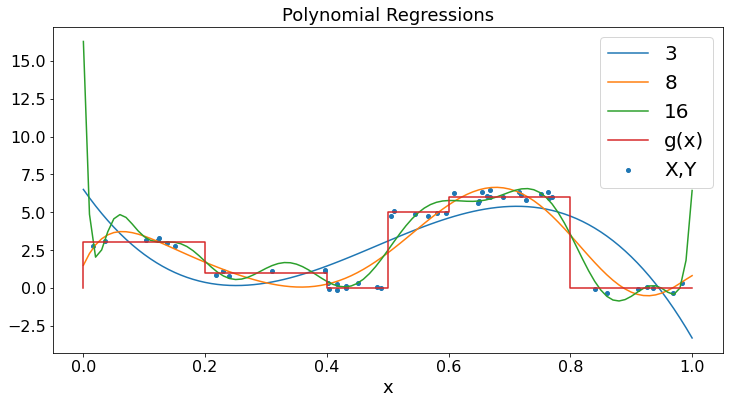

rmse =  [1.835 1.039 1.725]


In [18]:
from numpy import polyfit

Lg = [0.2, 0.4, 0.5, 0.6, 0.8, 0.9]
Ag = [3,1,0, 5,6,0]
Lh = [0,0.2, 0.4, 0.5, 0.6, 0.8, 1]
Ah = [0,3,1,0,5,6,0]

def func_g(x): # We define the function
    for i in range(6):
        if Lg[i] > x:
            return Ag[i]
    return Ag[5]


J = 100
xaxis = [0.01*j for j in range(101)]
yaxis = [func_g(x) for x in xaxis]
sigma = 0.3
def PLfit(M,sigma):
    global X, Y
    X = np.random.uniform(0,1,M)
    Y = np.zeros(M)
    for n in range(M):
        Y[n] = func_g(X[n]) + np.random.normal(0,sigma)
    plt.scatter(X,Y,label='X,Y')
    D = [3,8,16]
    rmse = np.zeros(len(D))
    i = 0
    for d in D:
        a = polyfit(X, Y, deg=d)
        y_pred = np.zeros(101)
        for j in range(101):
            for k in range(d+1):
                y_pred[j] += a[k]*xaxis[j]**(d-k) 
            rmse[i] += 0.01*(func_g(xaxis[j]) - y_pred[j])**2
        plt.plot(xaxis,y_pred,label=str(d))
        rmse[i] = round(rmse[i]**0.5,3)
        i += 1
    return rmse

M = 50
rmse = PLfit(M,0.2)
plt.step(Lh, Ah, where='pre',label='g(x)')
plt.xlabel('x')
plt.title('Polynomial Regressions')
plt.legend()
plt.show()

print('rmse = ', rmse)

## Ridge Regularization

The example above shows that a polynomial regression of degree $3$ undefits the data. Also, a regression of degree $16$ overfits the data by trying to fit the noise that does not correspond to the funciton $g$.  To control the amount of overfitting, one can penalize large coefficients of the polynomial.  Instead of minimizing $SSE$, the sum of the squares of the errors, one can minimize

$$ \frac{1}{M} SSE + \lambda \sum_{k=0}^d a_k^2.$$

The factor $\lambda$ controls the amount of penalty.  The last term is called the **Ridge regularization**.  

Thus, the goal is to minimize

$$ \frac{1}{M} \sum_{n=1}^M (a_0 + a_1X_n + a_2 X^2_n + \cdots + a_d X^d_n - Y_n)^2 + \lambda \sum_{k=0}^d a_k^2.
$$

Setting to zero the partial derivative of this expression with respect to $a_k$, one gets

$$ \frac{1}{M} \sum_{n=1}^M (a_0 + a_1X_n + a_2 X^2_n + \cdots + a_d X^d_n - Y_n)X^k_n + \lambda a_k = 0.$$

That is,

$$ \sum_{j = 0}^d [A(k, j) + \lambda 1\{j = k\}] a_j = b_k$$

where

$$  A(k, j) = \frac{1}{M} \sum_{n=1}^M X^{j + k}_n $$

and

$$ b_k = \frac{1}{M} \sum_{n=1}^M X^k_n Y_n. $$

Writing these equations for $k = 0, \ldots, d$, one finds

$$ [A + \lambda \mathbf{I} ] a = b, $$

so that

$$ a = [A + \lambda \mathbf{I} ]^{-1} b.$$

We perform the calculations in the cell below.

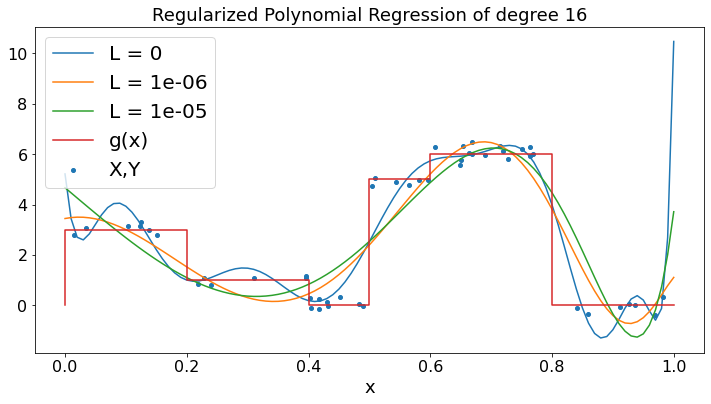

rmse =  [1.45  1.079 1.356]


In [19]:
from numpy import linalg
d = 16
A = np.zeros([d+1,d+1])
b = np.zeros(d+1)
for k in range(d+1):
    for n in range(M):
        b[k] += X[n]**k*Y[n]
    b[k] = b[k]/M
    for j in range(d+1):
        for n in range(M):
            A[k,j] += X[n]**(j+k)
        A[k,j] = A[k,j]/M
Lam = [0, 10**(-6), 10**(-5)]
rmse = np.zeros(len(Lam))
i = 0
for lam in Lam:
    y = np.zeros(101)
    D = A + lam*np.identity(d+1)            
    a = linalg.solve(D, b)
    for j in range(101):
        for k in range(d+1):
            y[j] += a[k]*xaxis[j]**k
        rmse[i] += 0.01*(y[j] - func_g(xaxis[j]))**2
    plt.plot(xaxis,y,label='L = ' + str(lam))
    rmse[i] = round(rmse[i]**0.5,3)
    i += 1
plt.scatter(X,Y,label='X,Y')
plt.step(Lh, Ah, where='pre',label='g(x)')
plt.xlabel('x')
plt.title('Regularized Polynomial Regression of degree ' + str(d))
plt.legend()
plt.show()

print('rmse = ', rmse)
    
    

##  K-Means

Instead of trying to fit a parametric functions to the data, the **K-means** algorithm approximates $Y$ by the average value of $Y_n$ for the $K$ values of $X_n$ closest to $X$.  The value of $K$ is a tradeoff between under- and overfitting.  

In one dimension, the algorithm for K-means is simple.  Let $Z$ be the data ordered in increasing values of $X_n$. We start with $A = Z[:K]$ that contains the first $K$ items of $Z$.  These are the $K$ neigbors of $x = 0$.
The value of $f(0)$ is the average of the values of $Y_n$ for $[X_n, Y_n]$ in $A$.  The value of $f(x)$ remains the same until $x$ reaches the average of $X_0$ and $X_{K+1}$.  Then one removes $A[0]$ from $A$ and one appends
$[X_{K+1}, Y_{K+1}]$. One then repeats.

We try that approach next.

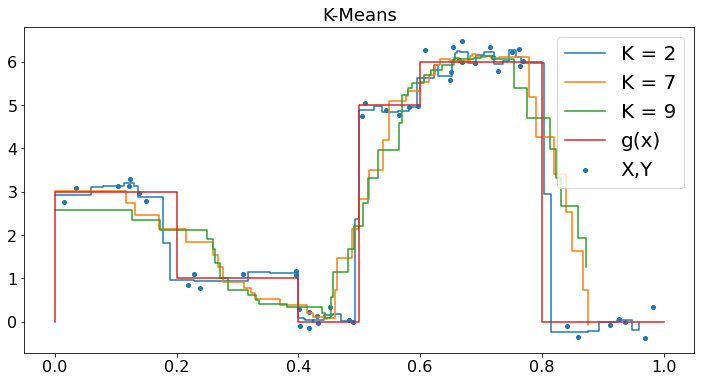

rmse =  [0.798 0.957 1.102]


In [20]:
# First, we sort the data by value of Xn
def byX(item):
    return item[0]
Z = [[X[n],Y[n]] for n in range(M)]
Z.sort(key=byX)

    
# Second, we look for the break points B where K-means function changes values and the values C of the function
Kset = [2,7,9]
rmse = np.zeros(len(Kset))
i = 0
for K in Kset:
    B = [0] 
    C = []
    A = Z[:K] # current set of closest neighbors
    Inext = K # index of next point
    while Inext < M:
        J = [item[1] for item in A]
        C.append(np.average(J))
        B.append((A[0][0] + Z[Inext][0])/2)
        del A[0]
        A.append(Z[Inext])
        Inext += 1
    J = [item[1] for item in A]
    C.append(np.average(J))        
    plt.step(B,C,where='post',label='K = '+str(K))
    for j in range(101):
        for a in range(1,len(B)):
            if B[a] > xaxis[j]:
                rmse[i] += 0.01*(C[a] - func_g(xaxis[j]))**2
                break
    rmse[i] = round(rmse[i]**0.5,3)
    i += 1
plt.scatter(X,Y,label='X,Y')
plt.step(Lh, Ah, where='pre',label='g(x)')
plt.legend()
plt.title('K-Means')
plt.show()

print('rmse = ', rmse)



## Regression Tree

Let $Z$ be the data sorted in increasing values of $X_n$. 
For any subset $S$ of $Z$, define $AV(S)$ to be the average value of $Y_n$ for $[X_n, Y_n]$ in $S$.
Let also $SSE(S)$ be the sum of $(Y_n - AV(S))^2$ for $[X_n, Y_n]$ in $S$.

As an iteration step, assume that one has partitioned the range of values of $X_n$ into $K$ intervals
and let  $Z = Z_0 + Z_1 + \cdots + Z_K$ be the corresponding partition of $Z$ where $Z_k$ are the values $(X_n, Y_n)$ in $Z$ for which $X_n$ is in the $k$th interval.
Let $k$ be the value that maximizes $SSE(Z_k)$.
One splits $Z_k$ into two subsets $Z_{k,0} + Z_{k, 1}$
that correspond to a partition of the interval of values of $X_n$ for
$[X_n, Y_n]$ in $Z_k$.   The partition is chosen to minimize $SSE(Z_{k,0}) + SSE(Z_{k,1})$.

One then proceeds iteratively until the depth of the tree reaches a specified maximum value.
The cell below implements that algorithm.  Note the underfitting and overfitting depending on the maximum depth
of the tree.

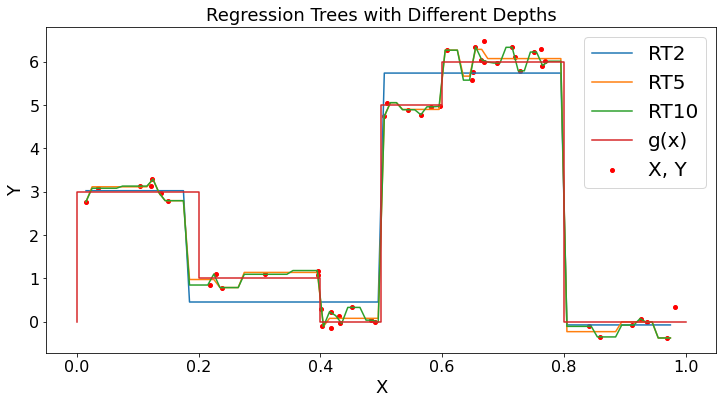

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import sklearn

x = np.array(X).reshape(len(X),1)

# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
for max_depth in [2,5,10]:
    
    # create a regressor object
    regressor = DecisionTreeRegressor(random_state = 0, max_depth = max_depth) 

    # fit the regressor with X and Y data
    regressor.fit(x, Y)

    # arange for creating a range of values 
    # from min value of X to max value of X 
    # with a difference of 0.01 between two
    # consecutive values
    X_grid = np.arange(min(X), max(X), 0.01)

    # reshape for reshaping the data into 
    # a len(X_grid)*1 array, i.e. to make
    # a column out of the X_grid values
    X_grid = X_grid.reshape((len(X_grid), 1))
    
    # plot predicted data
    plt.plot(X_grid, regressor.predict(X_grid), label='RT'+ str(max_depth)) 
  
# scatter plot for original data
plt.scatter(X, Y, color = 'red',label='X, Y')
  
# plot function
plt.step(Lh, Ah, where='pre',label='g(x)')
  
# specify title
plt.title('Regression Trees with Different Depths') 
  
# specify X axis label
plt.xlabel('X')
  
# specify Y axis label
plt.ylabel('Y')

plt.legend()
  
# show the plot
plt.show()

## Boosted Regression Tree

Next we build a boosted regression tree. The algorithm was explained in the Chapter **Image Processing**.

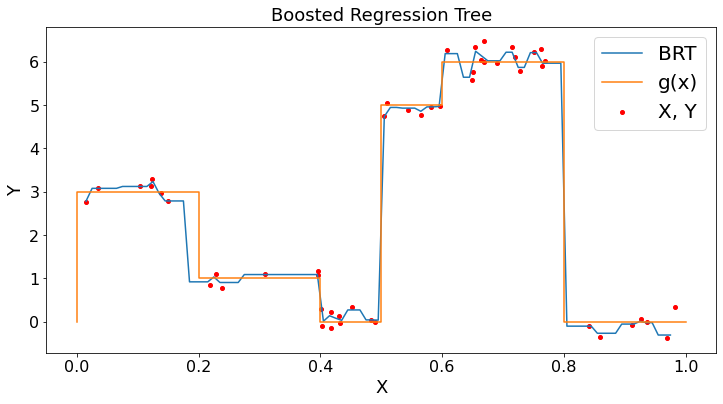

In [22]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
#X, y = make_regression(random_state=0)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(x, Y)

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

# plot predicted data
plt.plot(X_grid, reg.predict(X_grid), label='BRT') 
  
# scatter plot for original data
plt.scatter(X, Y, color = 'red',label='X, Y')
  
# plot function
plt.step(Lh, Ah, where='pre',label='g(x)')
  
# specify title
plt.title('Boosted Regression Tree') 
  
# specify X axis label
plt.xlabel('X')
  
# specify Y axis label
plt.ylabel('Y')

plt.legend()
  
# show the plot
plt.show()
